In [ ]:
# import libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore") # turn off warning

# Import and Check Dataset

In [ ]:
# import titanic dataset from github
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable Description:

1.   survival : passenger survival status (0 = No, 1 = Yes)
2.   pclass : ticket class (1 = Upper, 2 = Middle, 3 = Lower)
3. sex : gender (male, female)
4. age : age in years
5. sibsp : # of siblings / spouses aboard the Titanic	
6. parch : # of parents / children aboard the Titanic	
7. ticket : ticker number
8. fare : passenger fare
9. cabin : cabin number
10. embarked : port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)



In [ ]:
# variable types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> Dataset has 891 observations and 12 features.

> Response variable is "Survived" as an indication if the passenger survived or not

# Data Preprocessing and EDA

In [ ]:
# check for missing values in percent
titanic.isnull().sum()*100 /len(titanic)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

> there are missing in age, cabin and embarked

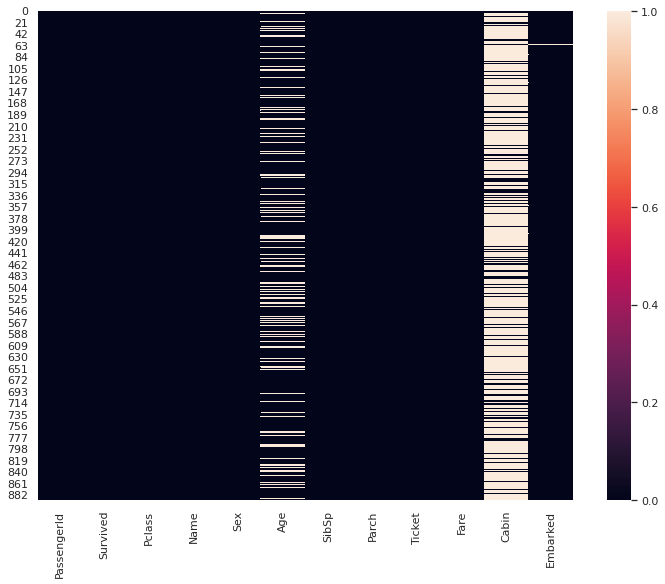

In [ ]:
# map missing data
sns.set(rc={'figure.figsize':(12,9)}) # set graph size
sns.heatmap(titanic.isnull())

> white means missing

## Data Cleaning

for age, with 20% missing we can replace them using median or mean based on pclass

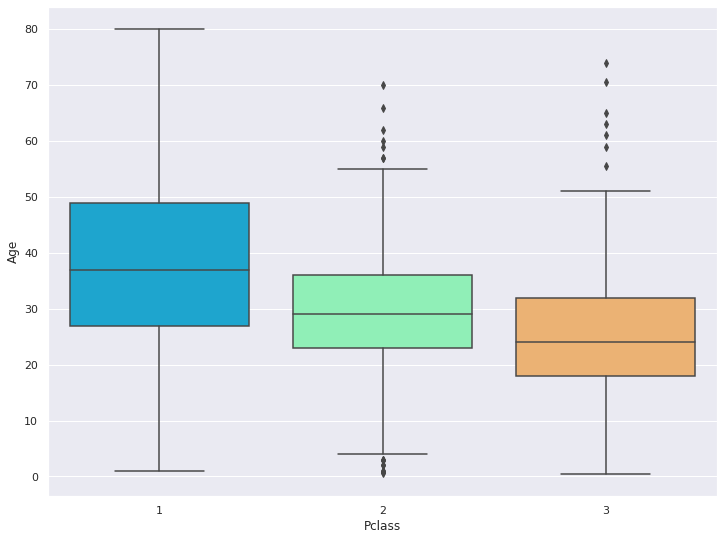

In [ ]:
# boxlot to age per pclass
sns.boxplot(x="Pclass", y="Age", data=titanic,palette='rainbow') # mean is the line in the middle of the box

In [ ]:
# will use median since there outliers
titanic.groupby("Pclass")['Age'].median() # check age per pclass

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [ ]:
# check median age per gender per pclass
titanic.groupby(["Sex","Pclass"])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
# grouping the age. ".transform to impute the values based on sex, pclass and median age"
titanic['Age'] = titanic['Age'].fillna(titanic.groupby(["Sex","Pclass"])['Age'].transform('median')) 

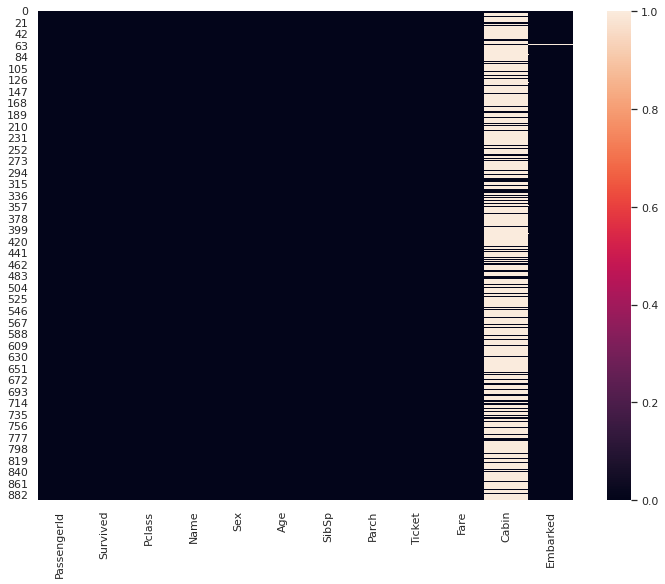

In [ ]:
sns.heatmap(titanic.isnull()) # check heatmap again

for Cabin with 77% missing, we will drop this column

In [ ]:
titanic.drop('Cabin',axis=1,inplace=True) # axis 1 is col and "inplace" to make permanent change

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic.dropna(inplace=True) # drop the remaing NA observations (i.e. Emabarked)

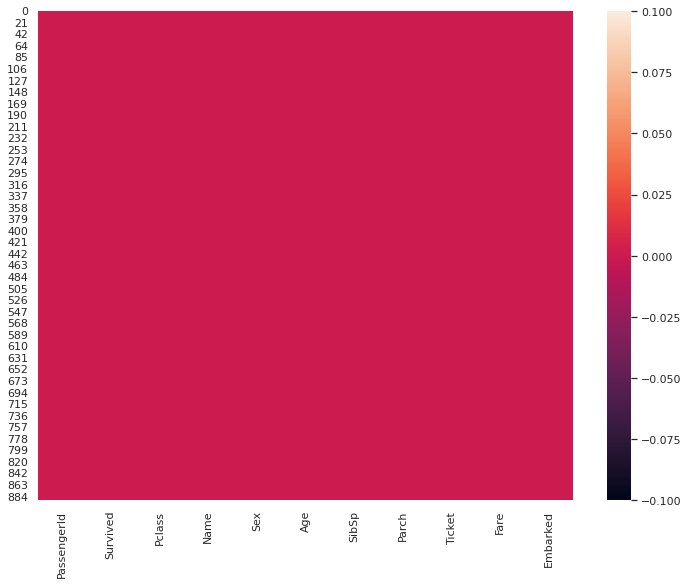

In [ ]:
sns.heatmap(titanic.isnull()) # check heatmap again

> no more missing

## Convert Categorical Variable

In [ ]:
sex = pd.get_dummies(titanic['Sex']) # dummification process
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True) # drop female variable since if value is 0 it means female
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
embark = pd.get_dummies(titanic['Embarked'],drop_first=True) # drop 1 embark station, if both value equal zero embark station will be C = Cherbourg
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
# remove not needed columns in the original dataset
titanic.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
titanic = pd.concat([titanic, sex, embark], axis = 1) # embed changes to the dataset
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Training Models

## Train & Test Dataset Split
Separate independent variables (as X) and target variable (as Y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from pandas.core.common import random_state
X_train, X_test, Y_train, Y_test = train_test_split(titanic.drop('Survived', axis = 1), # X dataset, drop everything except "Survived" variable
                                                    titanic['Survived'], # y as response
                                                    test_size = 0.30,
                                                    random_state = 123)


In [ ]:
# check dimension of original dataset
print("Titanic: ",titanic.shape)

# check dimension of split dataset
print("\n")
print("X_Train Shape: ",X_train.shape)
print("X_Test Shape: ",X_test.shape)
print("Y_Train Shape: ",Y_train.shape)
print("Y_Test Shape: ",Y_test.shape)

Titanic:  (889, 9)


X_Train Shape:  (622, 8)
X_Test Shape:  (267, 8)
Y_Train Shape:  (622,)
Y_Test Shape:  (267,)


## Standardization

In [ ]:
# scale the datasets because they have different variances as seen on data processing stage.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit on X_Train set only. Set parameters for scaler()
scaler.fit(X_train)

# apply transform to both train X and Y using X_train statistical properties
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(622, 8)

## Creating and Training the Model

### Simple Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logm = LogisticRegression() # assign function to logm; no penalty and use defaults for c = 1; max_iter = 100

In [ ]:
logm.fit(X_train, Y_train) # set log regression model

LogisticRegression()

Model Evaluation

In [ ]:
logm.intercept_ # model intercept

array([-0.71338031])

In [ ]:
logm.coef_

array([[-0.99662286, -0.66906868, -0.46911667, -0.03928741,  0.12918574,
        -1.25806968, -0.07694684, -0.20258746]])

Predictions from our Model

In [ ]:
y_prob = logm.predict(X_test) # predict values to test dataset using log model

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_prob

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
print(classification_report(Y_test, y_prob)) # classification report. True-Positive, False-Positive, etc

              precision    recall  f1-score   support

           0       0.61      0.99      0.76       161
           1       0.83      0.05      0.09       106

    accuracy                           0.62       267
   macro avg       0.72      0.52      0.42       267
weighted avg       0.70      0.62      0.49       267



In [ ]:
logm.score(X_test, Y_test)

0.6179775280898876

> our model predicts 62% accuracy

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test, y_prob) # confusion matrix

array([[160,   1],
       [101,   5]])

>True positive: 160 (We predicted a positive result and it was positive)

>True negative: 5 (We predicted a negative result and it was negative)

>False positive: 1 (We predicted a positive result and it was negative)

>False negative: 101 (We predicted a negative result and it was positive)

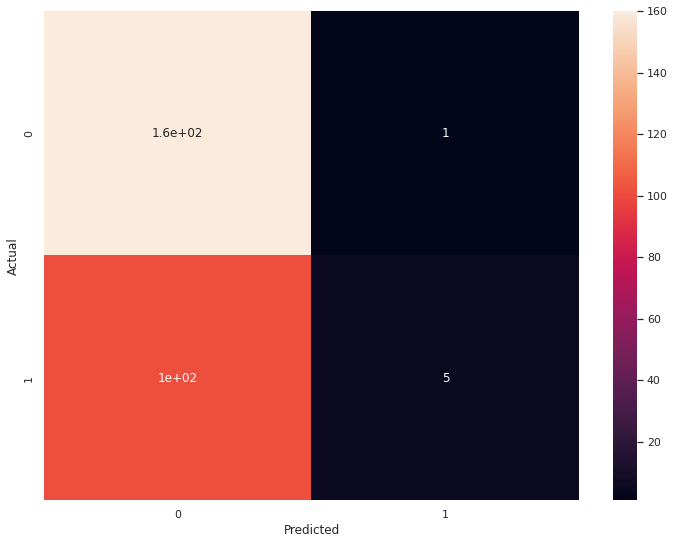

In [ ]:
# graph confusion matrix
conf_matrix = pd.crosstab(Y_test, y_prob, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

In [115]:
sum(np.abs(Y_test - y_prob)) # sum of incorrect predictions

102

In [116]:
pd.DataFrame({'Y_test': Y_test, 'y_prob': y_prob})

,Y_test,y_prob
173,0,0
525,0,0
453,1,0
171,0,0
883,0,0
...,...,...
840,0,0
373,0,0
120,0,0
418,0,0


### Logistic Regression with K-Cross Validation
Condition:

    (K from 2 to 5, multiple cases, penalty = ridge regression)

#### K = 2

In [106]:
from sklearn.linear_model import LogisticRegressionCV

In [107]:
# assign function to logm_k2; defaults for c = 1; max_iter = 100, penalty = l2 as ridge regression, 
logm_k2 = LogisticRegressionCV(cv = 2, multi_class = 'multinomial', penalty = 'l2') 

In [108]:
logm_k2.fit(X_train, Y_train) # set log regression model

LogisticRegressionCV(cv=2, multi_class='multinomial')

In [109]:
logm_k2.intercept_

array([-0.36048487])

In [110]:
logm_k2.coef_

array([[-0.51401808, -0.34695466, -0.24292219, -0.02025462,  0.06111712,
        -0.63988341, -0.03929064, -0.10200276]])

In [111]:
# Model prediction
y_prob_k2 = logm_k2.predict(X_test) # predict values to test dataset using log model

In [112]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_prob_k2)) # classification report. True-Positive, False-Positive, etc

              precision    recall  f1-score   support

           0       0.61      0.99      0.75       161
           1       0.75      0.03      0.05       106

    accuracy                           0.61       267
   macro avg       0.68      0.51      0.40       267
weighted avg       0.66      0.61      0.48       267



In [113]:
logm_k2.score(X_test, Y_test)

0.6104868913857678

In [114]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_prob_k2) # confusion matrix

array([[160,   1],
       [103,   3]])

In [117]:
sum(np.abs(Y_test - y_prob_k2)) # sum of incorrect predictions

104

#### K = 3

In [118]:
from sklearn.linear_model import LogisticRegressionCV

In [119]:
# assign function to logm_k2; defaults for c = 1; max_iter = 100, penalty = l2 as ridge regression, 
logm_k3 = LogisticRegressionCV(cv = 3, multi_class = 'multinomial', penalty = 'l2') 

In [120]:
logm_k3.fit(X_train, Y_train) # set log regression model

LogisticRegressionCV(cv=3, multi_class='multinomial')

In [121]:
logm_k3.intercept_

array([-0.36047749])

In [122]:
logm_k3.coef_

array([[-0.51402402, -0.3469667 , -0.24292519, -0.02026152,  0.06112129,
        -0.63989368, -0.0392953 , -0.10200262]])

In [123]:
# Model prediction
y_prob_k3 = logm_k3.predict(X_test) # predict values to test dataset using log model

In [124]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_prob_k3)) # classification report. True-Positive, False-Positive, etc

              precision    recall  f1-score   support

           0       0.61      0.99      0.75       161
           1       0.75      0.03      0.05       106

    accuracy                           0.61       267
   macro avg       0.68      0.51      0.40       267
weighted avg       0.66      0.61      0.48       267



In [125]:
logm_k3.score(X_test, Y_test)

0.6104868913857678

In [126]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_prob_k3) # confusion matrix

array([[160,   1],
       [103,   3]])

In [128]:
sum(np.abs(Y_test - y_prob_k3)) # sum of incorrect predictions

104

#### K = 4

In [129]:
from sklearn.linear_model import LogisticRegressionCV

In [130]:
# assign function to logm_k2; defaults for c = 1; max_iter = 100, penalty = l2 as ridge regression, 
logm_k4 = LogisticRegressionCV(cv = 4, multi_class = 'multinomial', penalty = 'l2') 

In [131]:
logm_k4.fit(X_train, Y_train) # set log regression model

LogisticRegressionCV(cv=4, multi_class='multinomial')

In [132]:
logm_k4.intercept_

array([-0.35984161])

In [133]:
logm_k4.coef_

array([[-0.51140009, -0.34488881, -0.24152337, -0.02016539,  0.06170709,
        -0.63809552, -0.03916351, -0.1018887 ]])

In [134]:
# Model prediction
y_prob_k4 = logm_k4.predict(X_test) # predict values to test dataset using log model

In [135]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_prob_k4)) # classification report. True-Positive, False-Positive, etc

              precision    recall  f1-score   support

           0       0.61      0.99      0.75       161
           1       0.75      0.03      0.05       106

    accuracy                           0.61       267
   macro avg       0.68      0.51      0.40       267
weighted avg       0.66      0.61      0.48       267



In [136]:
logm_k4.score(X_test, Y_test)

0.6104868913857678

In [137]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_prob_k4) # confusion matrix

array([[160,   1],
       [103,   3]])

In [138]:
sum(np.abs(Y_test - y_prob_k4)) # sum of incorrect predictions

104

#### K = 5

In [139]:
from sklearn.linear_model import LogisticRegressionCV

In [142]:
# defaults for c = 1; max_iter = 100, penalty = l2 as ridge regression, 
logm_k5 = LogisticRegressionCV(cv = 5, multi_class = 'multinomial', penalty = 'l2') 

In [143]:
logm_k5.fit(X_train, Y_train) # set log regression model

LogisticRegressionCV(cv=5, multi_class='multinomial')

In [144]:
logm_k5.intercept_

array([-0.33249718])

In [145]:
logm_k5.coef_

array([[-0.39490165, -0.25299906, -0.18043168, -0.01322341,  0.08404691,
        -0.55044045, -0.03165221, -0.09474401]])

In [146]:
# Model prediction
y_prob_k5 = logm_k5.predict(X_test) # predict values to test dataset using log model

In [147]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_prob_k5)) # classification report. True-Positive, False-Positive, etc

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       161
           1       0.82      0.13      0.23       106

    accuracy                           0.64       267
   macro avg       0.73      0.56      0.50       267
weighted avg       0.71      0.64      0.55       267



In [148]:
logm_k5.score(X_test, Y_test)

0.6441947565543071

In [149]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_prob_k5) # confusion matrix

array([[158,   3],
       [ 92,  14]])

In [150]:
sum(np.abs(Y_test - y_prob_k5)) # sum of incorrect predictions

95